In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import random

In [2]:
from data_reduction.statistic import srs_selection, prd_selection
from data_reduction.geometric import clc_selection, mms_selection, des_selection
from data_reduction.ranking import phl_selection, nrmd_selection, psa_selection

In [3]:
def plot_dataset(X0,X1,X0_res=None,X1_res=None):
    plt.scatter(X0[:, 0], X0[:, 1], marker='o', edgecolors='blue', facecolors='none', label='Clase 0')
    plt.scatter(X1[:, 0], X1[:, 1], marker='o', edgecolors='red', facecolors='none', label='Clase 1')
    if X0_res is not None:
        plt.scatter(X0_res[:, 0], X0_res[:, 1], marker='o', edgecolors='blue', label='Clase 0')
        plt.scatter(X1_res[:, 0], X1_res[:, 1], marker='o', edgecolors='red', label='Clase 1')

Creamos el dataset

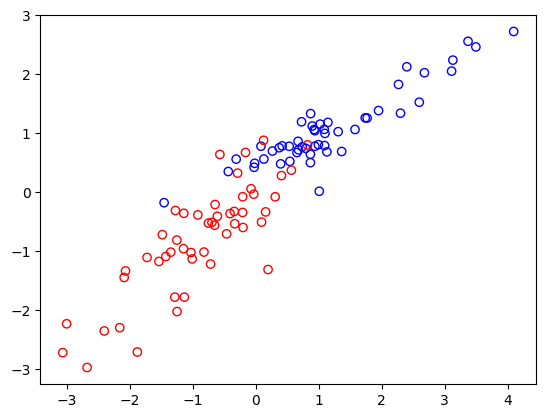

In [4]:
X,y=make_classification(n_samples=100, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0)

X0 = X[y == 0]
X1 = X[y == 1]

plot_dataset(X0,X1)

Fijamos el porcentaje

In [5]:
perc=0.50

Ejemplo de SRS

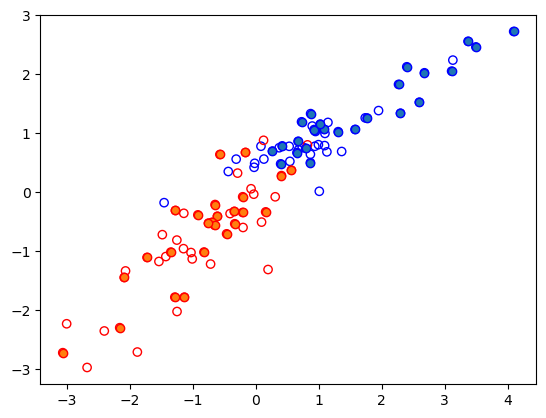

In [6]:
X_res, y_res = srs_selection(X,y,perc)

X0_res=X_res[y_res==0]
X1_res=X_res[y_res==1]  

plot_dataset(X0,X1,X0_res,X1_res)

Ejemplo de Clustering Centroids

C:\Users\Javier\.conda\envs\survey_copia\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Javier\.conda\envs\survey_copia\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


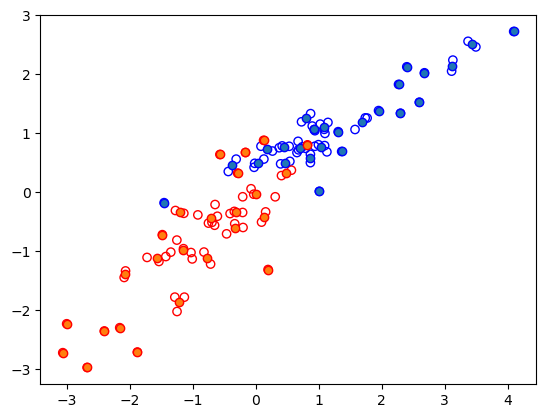

In [7]:
X_res, y_res = clc_selection(X,y,perc)

X0_res=X_res[y_res==0]
X1_res=X_res[y_res==1] 

plot_dataset(X0,X1,X0_res,X1_res)

Ejemplo de Maxmin

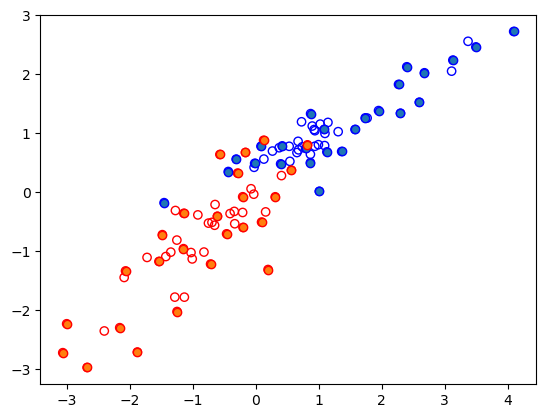

In [8]:
X_res, y_res = mms_selection(X,y,perc)

X0_res=X_res[y_res==0]
X1_res=X_res[y_res==1]  

plot_dataset(X0,X1,X0_res,X1_res)

Ejemplo de Distance-Entropy Selection

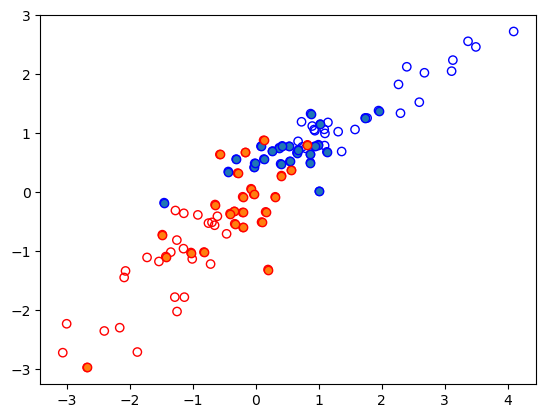

In [9]:
X_res, y_res = des_selection(X, y, perc, perc_base=0.5*perc)

X0_res=X_res[y_res==0]
X1_res=X_res[y_res==1] 

plot_dataset(X0,X1,X0_res,X1_res)

Ejemplo de PH Landmarks

C:\Users\Javier\.conda\envs\survey_copia\lib\site-packages\ripser\ripser.py:247: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  warnings.warn(


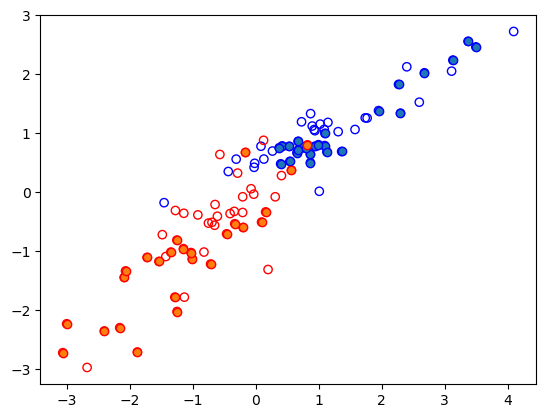

In [10]:
X_res, y_res = phl_selection(X, y, topological_radius=1, perc=perc, scoring_version='multiDim', dimension=1, landmark_type='vital')

X0_res=X_res[y_res==0]
X1_res=X_res[y_res==1] 

plot_dataset(X0,X1,X0_res,X1_res)

Ejemplo de Data Reduction with Matrix Decomposition

C:\Users\Javier\.conda\envs\survey_copia\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


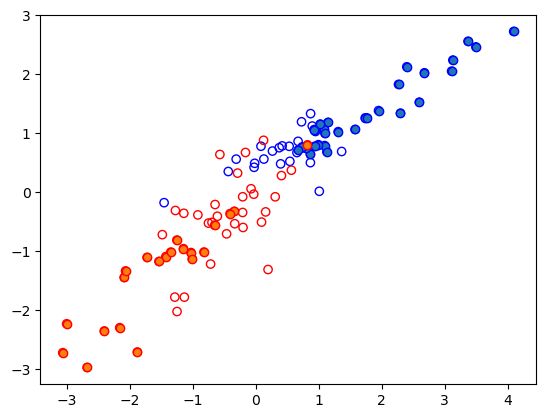

In [11]:
X_res, y_res = nrmd_selection(X,y,perc,decomposition='SVD_python')

X0_res=X_res[y_res==0]
X1_res=X_res[y_res==1] 

plot_dataset(X0,X1,X0_res,X1_res)

Ejemplo de Principal Sample Analysis

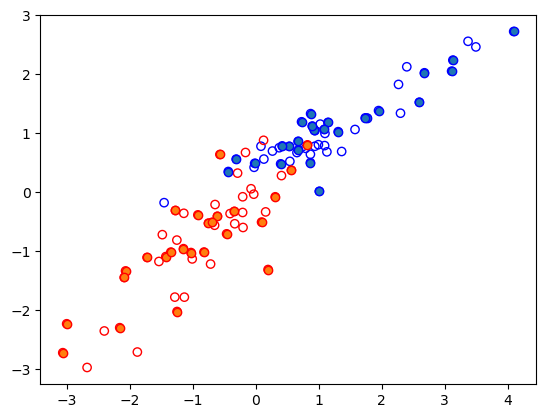

In [12]:
X_res, y_res = psa_selection(X,y,perc,RANSAC=20)

X0_res=X_res[y_res==0]
X1_res=X_res[y_res==1] 

plot_dataset(X0,X1,X0_res,X1_res)

Ejemplo de ProtoDash selection

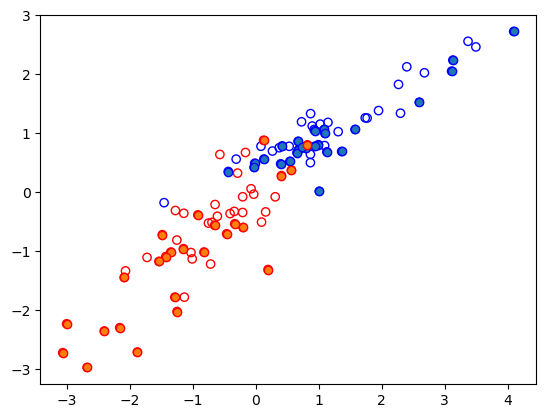

In [13]:
X_res, y_res = prd_selection(X,y,perc, sigma=2, opt='osqp')

X0_res=X_res[y_res==0]
X1_res=X_res[y_res==1] 

plot_dataset(X0,X1,X0_res,X1_res)